# INIT

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os
import pickle
from matplotlib import cm
from tqdm.notebook import tqdm
import torch
import random
from itertools import product
import collections
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import torch
import torch.nn as nn
import yaml
from collections import Counter
import math
from matplotlib.patches import Polygon
from scipy.optimize import curve_fit
from utils.topology import NetworkTopology, get_msg_graph
import shutil

# dir

In [1]:
add_v16 = [
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-23-22-10-40_train_16_(3,2,1)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-23-22-10-43_train_16_(4,3,2)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-23-22-10-46_train_16_(5,4,3)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-23-22-10-49_train_16_(6,5,4)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-23-22-10-52_train_16_(7,6,5)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-02-32-24_train_16_(8,7,6)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-02-32-27_train_16_(9,8,7)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-02-32-30_train_16_(10,9,8)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-02-32-33_train_16_(11,10,9)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-02-32-37_train_16_(12,11,10)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-12-55-46_train_16_(13,12,11)_64_10_add', 
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-12-55-50_train_16_(14,13,12)_64_10_add',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2020-Dec-24-12-55-53_train_16_(15,14,13)_64_10_add'
]
att_v16 = [
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-15-22-55-38_train_16_(3,2,1)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-15-22-55-41_train_16_(4,3,2)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-15-22-55-44_train_16_(5,4,3)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-15-22-55-47_train_16_(6,5,4)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-15-22-55-50_train_16_(7,6,5)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-04-18-22_train_16_(8,7,6)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-04-18-25_train_16_(9,8,7)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-04-18-29_train_16_(10,9,8)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-04-18-32_train_16_(11,10,9)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-04-18-35_train_16_(12,11,10)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-10-31-34_train_16_(13,12,11)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-10-31-37_train_16_(14,13,12)_64_10_att___',
'GNN_exp/V=16/train_0.75/TorchGNN_001_Torchloader_2021-Jan-16-10-31-40_train_16_(15,14,13)_64_10_att___'
]
add_v16_sk = [
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(3,2,1)_2021-Mar-08-09-32-06_train_64_10_add__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.75_2021-Mar-26-02-28-53_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(5,4,3)_2021-Mar-08-09-32-09_train_64_10_add__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.75_2021-Mar-26-02-28-56_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(7,6,5)_2021-Mar-08-09-32-13_train_64_10_add__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.75_2021-Mar-26-02-28-59_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.75_2021-Mar-26-02-29-02_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(10,9,8)_2021-Mar-08-09-32-17_train_64_10_add__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.75_2021-Mar-26-02-29-05_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.75_2021-Mar-26-02-29-08_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(13,12,11)_2021-Mar-08-09-32-19_train_64_10_add__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.75_2021-Mar-26-02-29-11_train_64_10_add__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(15,14,13)_2021-Mar-08-09-32-22_train_64_10_add__SK_"
]

add_v16_ip = [
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(3,2,1)_2021-Mar-08-15-03-36_train_64_10_add__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.75_2021-Mar-26-02-29-14_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(5,4,3)_2021-Mar-08-15-03-38_train_64_10_add__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.75_2021-Mar-26-02-29-17_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(7,6,5)_2021-Mar-08-15-03-41_train_64_10_add__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.75_2021-Mar-26-02-29-20_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.75_2021-Mar-26-02-29-23_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(10,9,8)_2021-Mar-08-15-03-43_train_64_10_add__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.75_2021-Mar-26-02-29-26_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.75_2021-Mar-26-02-29-29_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(13,12,11)_2021-Mar-08-15-03-47_train_64_10_add__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.75_2021-Mar-26-02-29-32_train_64_10_add__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(15,14,13)_2021-Mar-08-15-03-50_train_64_10_add__SK_IP",
]
att_v16_sk = [
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(3,2,1)_2021-Mar-09-08-52-09_train_64_10_att__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.75_2021-Mar-26-10-10-14_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(5,4,3)_2021-Mar-09-08-52-12_train_64_10_att__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.75_2021-Mar-26-10-10-17_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(7,6,5)_2021-Mar-09-08-52-15_train_64_10_att__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.75_2021-Mar-26-10-10-20_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.75_2021-Mar-26-10-10-23_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(10,9,8)_2021-Mar-09-08-52-18_train_64_10_att__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.75_2021-Mar-26-10-10-26_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.75_2021-Mar-26-10-10-29_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(13,12,11)_2021-Mar-09-08-52-21_train_64_10_att__SK_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.75_2021-Mar-26-10-10-32_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(15,14,13)_2021-Mar-09-08-52-24_train_64_10_att__SK_",
]

att_v16_ip = [
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(3,2,1)_2021-Mar-09-02-23-09_train_64_10_att__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.75_2021-Mar-26-10-10-35_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(5,4,3)_2021-Mar-09-02-23-12_train_64_10_att__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.75_2021-Mar-26-10-10-38_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(7,6,5)_2021-Mar-09-02-23-15_train_64_10_att__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.75_2021-Mar-26-10-10-41_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.75_2021-Mar-26-10-10-44_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(10,9,8)_2021-Mar-09-02-23-18_train_64_10_att__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.75_2021-Mar-26-10-10-47_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.75_2021-Mar-26-10-10-50_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(13,12,11)_2021-Mar-09-02-23-21_train_64_10_att__SK_IP",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.75_2021-Mar-26-10-10-53_train_64_10_att__SK_IP_",
"GNN_exp/V=16/train_0.75/TorchGNN_001_TorchGeoLoader_(15,14,13)_2021-Mar-09-02-23-24_train_64_10_att__SK_IP"
]

#################################################################################################

add_v16_03 = [
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.3_2021-Mar-10-08-14-55_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.3_2021-Mar-16-13-17-58_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.3_2021-Mar-10-05-18-39_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.3_2021-Mar-16-13-18-01_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.3_2021-Mar-10-05-18-41_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.3_2021-Mar-16-13-18-04_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.3_2021-Mar-16-13-18-07_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-10-05-18-44_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.3_2021-Mar-16-13-18-10_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.3_2021-Mar-16-13-18-13_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.3_2021-Mar-10-05-18-48_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.3_2021-Mar-16-13-18-16_train_64_10_add___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.3_2021-Mar-10-05-18-51_train_64_10_add___"
]
att_v16_03 = [
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.3_2021-Mar-17-10-42-30_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.3_2021-Mar-17-10-42-33_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.3_2021-Mar-17-10-42-36_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.3_2021-Mar-17-10-42-39_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.3_2021-Mar-17-10-42-42_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.3_2021-Mar-17-10-42-45_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.3_2021-Mar-17-10-42-48_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-17-10-42-51_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.3_2021-Mar-17-10-42-54_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.3_2021-Mar-17-10-42-57_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.3_2021-Mar-17-10-43-00_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.3_2021-Mar-17-10-43-03_train_64_10_att___",
"GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.3_2021-Mar-17-10-43-06_train_64_10_att___" 
]
add_v16_03_sk = [
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.3_2021-Mar-22-14-26-45_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.3_2021-Mar-22-14-26-48_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.3_2021-Mar-22-14-26-52_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.3_2021-Mar-22-14-26-55_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.3_2021-Mar-22-14-26-58_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.3_2021-Mar-22-14-27-01_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.3_2021-Mar-22-14-27-04_train_64_10_add__SK_', 'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-22-14-27-07_train_64_10_add__SK_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.3_2021-Mar-22-14-27-10_train_64_10_add__SK_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.3_2021-Mar-22-14-27-13_train_64_10_add__SK_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.3_2021-Mar-22-14-27-16_train_64_10_add__SK_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.3_2021-Mar-22-14-27-19_train_64_10_add__SK_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.3_2021-Mar-22-14-27-22_train_64_10_add__SK_'
]
add_v16_03_ip = [
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.3_2021-Mar-23-14-12-49_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.3_2021-Mar-23-14-12-52_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.3_2021-Mar-23-14-12-55_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.3_2021-Mar-23-14-12-58_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.3_2021-Mar-23-14-13-01_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.3_2021-Mar-23-14-13-04_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.3_2021-Mar-23-14-13-07_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-23-14-13-10_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.3_2021-Mar-23-14-13-13_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.3_2021-Mar-23-14-13-16_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.3_2021-Mar-23-14-13-19_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.3_2021-Mar-23-14-13-22_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.3_2021-Mar-23-14-13-26_train_64_10_add__SK_IP_'
]
att_v16_03_sk = [
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.3_2021-Mar-24-10-50-19_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.3_2021-Mar-24-10-50-22_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.3_2021-Mar-24-10-50-25_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.3_2021-Mar-24-10-50-28_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.3_2021-Mar-24-10-50-31_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.3_2021-Mar-24-10-50-34_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.3_2021-Mar-24-10-50-37_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-24-17-14-11_train_64_10_att__SK__',
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.3_2021-Mar-24-17-14-08_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.3_2021-Mar-24-17-14-05_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.3_2021-Mar-24-17-14-03_train_64_10_att__SK__',
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.3_2021-Mar-24-10-50-53_train_64_10_att__SK__', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.3_2021-Mar-24-10-50-56_train_64_10_att__SK__'
]
att_v16_03_ip = [
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.3_2021-Mar-23-18-50-41_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.3_2021-Mar-23-18-50-44_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.3_2021-Mar-23-18-50-47_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.3_2021-Mar-23-18-50-50_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.3_2021-Mar-23-18-50-53_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.3_2021-Mar-23-18-50-56_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.3_2021-Mar-23-18-50-59_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.3_2021-Mar-23-18-51-02_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.3_2021-Mar-23-18-51-05_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.3_2021-Mar-23-18-51-08_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.3_2021-Mar-23-18-51-11_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.3_2021-Mar-23-18-51-15_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.3/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.3_2021-Mar-23-18-51-18_train_64_10_att__SK_IP_'  
]

#################################################################################################

add_v16_06 = [
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.6_2021-Mar-18-04-38-41_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.6_2021-Mar-18-04-38-43_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.6_2021-Mar-18-04-38-46_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.6_2021-Mar-18-04-38-50_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.6_2021-Mar-18-04-38-53_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.6_2021-Mar-18-04-38-56_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.6_2021-Mar-18-04-41-21_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.6_2021-Mar-29-14-22-40_train_64_10_add____",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.6_2021-Mar-18-04-41-28_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.6_2021-Mar-18-04-41-31_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.6_2021-Mar-18-04-41-35_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.6_2021-Mar-18-04-41-37_train_64_10_add___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.6_2021-Mar-18-04-41-41_train_64_10_add___"
]
att_v16_06 = [
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.6_2021-Mar-18-13-44-43_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.6_2021-Mar-18-13-44-46_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.6_2021-Mar-18-13-44-49_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.6_2021-Mar-18-13-44-52_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.6_2021-Mar-18-13-44-55_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.6_2021-Mar-27-04-25-12_train_64_10_att____",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.6_2021-Mar-18-13-45-01_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.6_2021-Mar-18-13-45-04_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.6_2021-Mar-18-13-45-07_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.6_2021-Mar-18-13-45-10_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.6_2021-Mar-18-13-45-13_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.6_2021-Mar-18-13-45-17_train_64_10_att___",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.6_2021-Mar-18-13-45-20_train_64_10_att___",
]
add_v16_06_sk = [
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.6_2021-Mar-24-17-48-30_train_64_10_add__SK__', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.6_2021-Mar-24-17-48-33_train_64_10_add__SK__', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.6_2021-Mar-24-17-48-37_train_64_10_add__SK__', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.6_2021-Mar-24-17-48-40_train_64_10_add__SK__',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.6_2021-Mar-24-17-48-43_train_64_10_add__SK__',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.6_2021-Mar-24-17-48-46_train_64_10_add__SK__', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.6_2021-Mar-24-17-48-50_train_64_10_add__SK__', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.6_2021-Mar-24-17-48-53_train_64_10_add__SK__',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.6_2021-Mar-24-17-48-57_train_64_10_add__SK__',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.6_2021-Mar-24-17-49-00_train_64_10_add__SK__',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.6_2021-Mar-24-17-49-03_train_64_10_add__SK__',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.6_2021-Mar-24-17-49-06_train_64_10_add__SK__', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.6_2021-Mar-24-17-49-09_train_64_10_add__SK__'
]
add_v16_06_ip = [
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.6_2021-Mar-25-03-14-50_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.6_2021-Mar-25-03-14-53_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.6_2021-Mar-25-03-14-56_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.6_2021-Mar-25-03-14-59_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.6_2021-Mar-25-03-15-02_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.6_2021-Mar-25-03-15-05_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.6_2021-Mar-25-03-15-08_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.6_2021-Mar-25-03-15-11_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.6_2021-Mar-25-03-15-14_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.6_2021-Mar-25-03-15-17_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.6_2021-Mar-25-03-15-20_train_64_10_add__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.6_2021-Mar-25-03-15-23_train_64_10_add__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.6_2021-Mar-25-03-15-27_train_64_10_add__SK_IP_'  
]
att_v16_06_sk = [
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.6_2021-Mar-25-18-48-16_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.6_2021-Mar-25-18-48-19_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.6_2021-Mar-25-18-48-22_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.6_2021-Mar-25-18-48-25_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.6_2021-Mar-25-18-48-28_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.6_2021-Mar-25-18-48-31_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.6_2021-Mar-25-18-48-34_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.6_2021-Mar-25-18-48-37_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.6_2021-Mar-25-18-48-40_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.6_2021-Mar-25-18-48-43_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.6_2021-Mar-25-18-48-46_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.6_2021-Mar-25-18-48-49_train_64_10_att__SK__",
"GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.6_2021-Mar-25-18-48-52_train_64_10_att__SK__"
]
att_v16_06_ip = [
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(3,2,1)_0.6_2021-Mar-25-08-37-10_train_64_10_att__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(4,3,2)_0.6_2021-Mar-25-08-37-13_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(5,4,3)_0.6_2021-Mar-25-08-37-16_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(6,5,4)_0.6_2021-Mar-25-08-37-19_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(7,6,5)_0.6_2021-Mar-25-08-37-22_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(8,7,6)_0.6_2021-Mar-25-08-37-25_train_64_10_att__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(9,8,7)_0.6_2021-Mar-25-08-37-28_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(10,9,8)_0.6_2021-Mar-25-08-37-31_train_64_10_att__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(11,10,9)_0.6_2021-Mar-25-08-37-34_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(12,11,10)_0.6_2021-Mar-25-08-37-37_train_64_10_att__SK_IP_',
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(13,12,11)_0.6_2021-Mar-25-08-37-40_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(14,13,12)_0.6_2021-Mar-25-08-37-43_train_64_10_att__SK_IP_', 
'GNN_exp/V=16/train_0.6/TorchGNN_001_TorchGeoLoader_(15,14,13)_0.6_2021-Mar-25-08-37-46_train_64_10_att__SK_IP_'  
]

add_v100 = [
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-07-16-37-53_train_100_group_4_64_10_add",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-07-16-37-49_train_100_group_3_64_10_add",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-07-16-37-47_train_100_group_2_64_10_add",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-07-16-37-43_train_100_group_1_64_10_add",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-07-16-37-40_train_100_group_0_64_10_add"
]

add_v100_sk = [
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-42_train_100_group_4_64_10_add__SK_",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-18_train_100_group_3_64_10_add__SK_",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-06_train_100_group_2_64_10_add__SK_",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-07-54_train_100_group_1_64_10_add__SK_",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-30_train_100_group_0_64_10_add__SK_"
]

add_v100_ip = [
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-45_train_100_group_4_64_10_add__SK_IP",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-21_train_100_group_3_64_10_add__SK_IP",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-09_train_100_group_2_64_10_add__SK_IP",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-07-57_train_100_group_1_64_10_add__SK_IP",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-33_train_100_group_0_64_10_add__SK_IP"
]

att_v100 = [
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-12-20-13-28_train_100_group_4_64_10_att___",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-12-20-13-31_train_100_group_3_64_10_att___",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-12-20-13-34_train_100_group_2_64_10_att___",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-12-20-13-37_train_100_group_1_64_10_att___",
"GNN_exp/V=100/TorchGNN_001_Torchloader_2021-Jan-18-18-56-21_train_100_group_0_64_10_att___"
]

att_v100_sk = [
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-48_train_100_group_4_64_10_att__SK_",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-24_train_100_group_3_64_10_att__SK_",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-12_train_100_group_2_64_10_att__SK_",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-00_train_100_group_1_64_10_att__SK_",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-36_train_100_group_0_64_10_att__SK_"
]

att_v100_ip = [
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-51_train_100_group_4_64_10_att__SK_IP",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-27_train_100_group_3_64_10_att__SK_IP",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-15_train_100_group_2_64_10_att__SK_IP",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-03_train_100_group_1_64_10_att__SK_IP",
"GNN_exp/V=100/TorchGNN_001_TorchGeoLoader_2021-Feb-20-18-08-39_train_100_group_0_64_10_att__SK_IP",
]

# code

In [27]:
test_path = []
c1,c2,c3,c4,c5,c6 = 0,0,0,0,0,0
for a,b,c,d,e,f in zip(add_v16_06,add_v16_sk,add_v16_ip,att_v16_06,att_v16_sk,att_v16_ip):
#     for _ in os.listdir(a):
#         if "exp2_test_16_0.6" in _:# and "0.3" not in _:
#             path = os.path.join(a,_)
#             c1+=1
#             break
#     test_path.append(path)
#     path=0
    
#     for _ in os.listdir(b):
#         if "exp2_test_16_0.3" in _:# and "0.3" not in _:
#             path = os.path.join(b,_)
#             c2+=1
#             break
#     test_path.append(path)
#     path=0
    
#     for _ in os.listdir(c):
#         if "exp2_test_16_0.3" in _:# and "0.3" not in _:
#             path = os.path.join(c,_)
#             c3+=1
#             break
#     test_path.append(path)
#     path=0
    
    for _ in os.listdir(d):
        if "exp2_test_16_0.6" in _:# and "0.3" not in _:
            path = os.path.join(d,_)
            c4+=1
            break
    test_path.append(path)
    path=0
    
#     for _ in os.listdir(e):
#         if "exp2_test_16_0.3" in _:# and "0.3" not in _:
#             path = os.path.join(e,_)
#             c5+=1
#             break
#     test_path.append(path)
#     path=0
    
#     for _ in os.listdir(f):
#         if "exp2_test_16_0.3" in _:# and "0.3" not in _:
#             path = os.path.join(f,_)
#             c6+=1
#             break
#     test_path.append(path)
#     path=0
print(c1,c2,c3,c4,c5,c6)

0 0 0 13 0 0


In [36]:
test_path = []
c1,c2,c3,c4,c5,c6 = 0,0,0,0,0,0
for a,b,c,d,e,f in zip(add_v100,add_v100_sk,add_v100_ip,att_v100,att_v100_sk,att_v100_ip):
#     for _ in os.listdir(a):
#         if "exp2_test_100_0.3" in _:
#             path = os.path.join(a,_)
#             c1+=1
#             test_path.append(path)
#             path=0
#             break
    
#     for _ in os.listdir(b):
#         if "exp2_test_100_0.3" in _:
#             path = os.path.join(b,_)
# #             print(path)
#             c2+=1
#             test_path.append(path)
#             path=0
#             break
    
#     for _ in os.listdir(c):
#         if "exp2_test_100_0.3" in _:
#             path = os.path.join(c,_)
# #             print(path)
#             c3+=1
#             test_path.append(path)
#             path=0
#             break
    
    for _ in os.listdir(d):
        if "exp2_test_100_0.3" in _:
            path = os.path.join(d,_)
#             print(path)
            c4+=1
            test_path.append(path)
            path=0
            break
    
#     for _ in os.listdir(e):
#         if "exp2_test_100_0.3" in _:
#             path = os.path.join(e,_)
#             c5+=1
#             test_path.append(path)
#             path=0
#             break
    
#     for _ in os.listdir(f):
#         if "exp2_test_100_0.3" in _:
#             path = os.path.join(f,_)
#             c6+=1
#             test_path.append(path)
#             path=0
#             break
   
print(c1,c2,c3,c4,c5,c6)

0 0 0 5 0 0


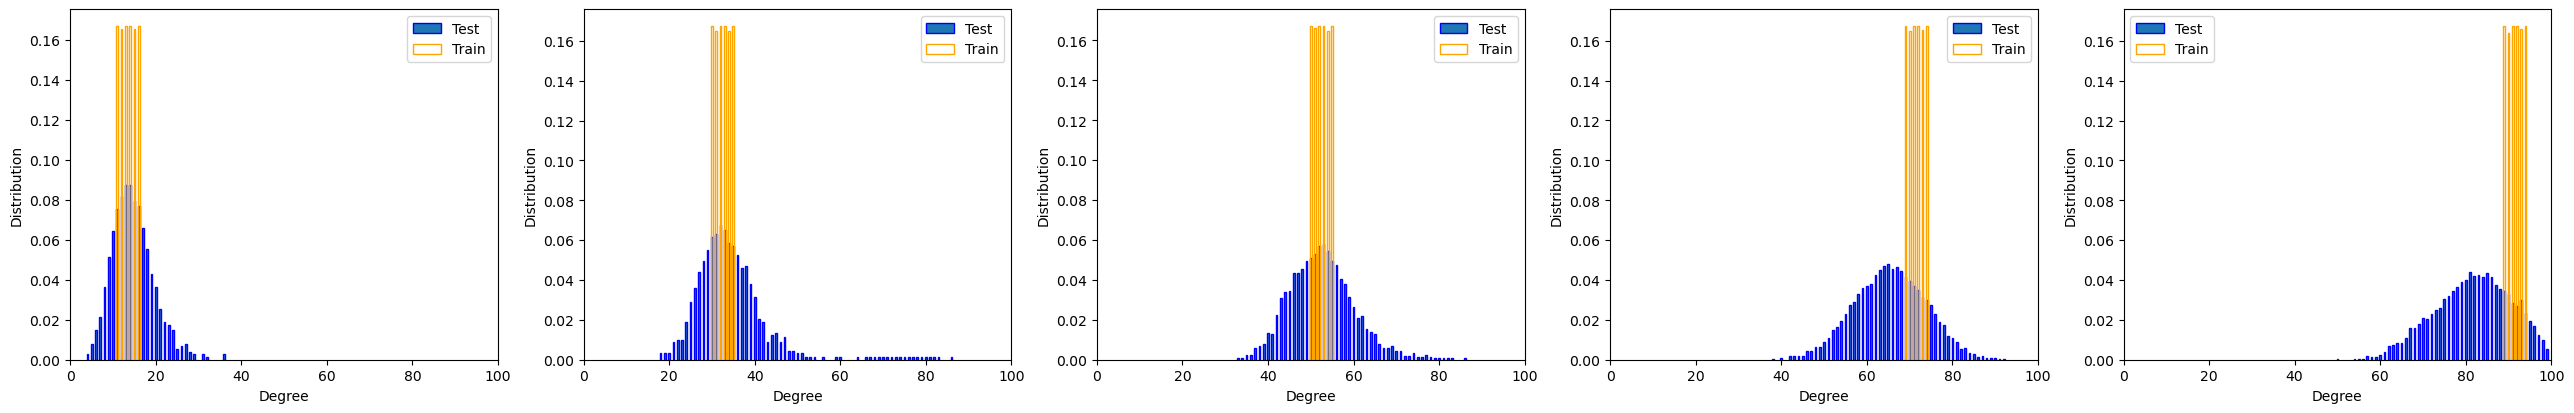

In [40]:
def degree(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_count = collections.Counter(degree_sequence)
    deg, cnt = zip(*degree_count.items())
    return degree_sequence, deg, cnt
def func(x, a, b, c):
    return a * (x - b) ** 2 + c

number_of_model = 1
f = plt.figure(figsize = (85,65), dpi = 100)
# deg_list_file = pickle.load(open("/Volumes/Mac/Dropbox/TorchGNN_project/deg_list.p", "rb"))

for x, path in tqdm(enumerate(test_path)):
    XYL = np.array(pickle.load(open(os.path.join(path, "XYL.p"), "rb")))
    name = pickle.load(open(os.path.join(path, "name.p"), "rb"))
    min_L = np.min(np.log10(XYL[:,2]))
    max_L = np.max(np.log10(XYL[:,2]))
    
    threshold = min_L+0.3*(max_L-min_L)
    graph_index_toplot = np.where(np.log10(XYL[:,2]) < threshold)[0]
    
    deg_list = []
    for index in graph_index_toplot:
        graph_name = name[index]
        for _ in os.listdir("data_temp/exp2_test_100_0.3"):
            if graph_name in _:
                graph = os.path.join("data_temp/exp2_test_100_0.3", _)
                break
        try:
            graph = pickle.load(open(graph, "rb"))
        except:
            print(graph)
        J = graph['J'].todense()
        G = nx.from_numpy_array(J)
        _, deg, _ = degree(G)
        deg_list+=deg
      
    ax = f.add_subplot(11, 13, int(x / number_of_model) + (x % number_of_model) * 13 + 1)
    a = Counter(deg_list)
    sum_count = sum(a.values())
    plt.bar(a.keys(), [i / sum_count for i in list(a.values())], fill=True, edgecolor='blue', width=0.4,label='Test')
    plt.ylabel("Distribution")
    plt.xlabel("Degree")

    plt.xlim(0, 100)
    
#     train_deg_list = pickle.load(open("/Volumes/Mac/Dropbox/TorchGNN_project/data_temp/unique_graph_16/unique_degree_shell/({},{},{}).p".format(x+3, x+2, x+1), "rb"))
    train_deg_list = pickle.load(open("/Volumes/Mac/Dropbox/TorchGNN_project/data_temp/unique_graph_100/group_{}.p".format(4-x), "rb"))
        
    a = Counter(train_deg_list)
    sum_count = sum(a.values())
    plt.bar(a.keys(), [i / sum_count for i in list(a.values())], fill=False, edgecolor='orange', width=0.4,label='Train')
    plt.legend()


plt.subplots_adjust(hspace=0.3)

In [41]:
f.savefig("/Volumes/Mac/Dropbox/Elements/무제 폴더/1)How Unique degree affect/exp2_2_V100_0.3toV100_0.3_att_degreedist.pdf", bbox_inches='tight')

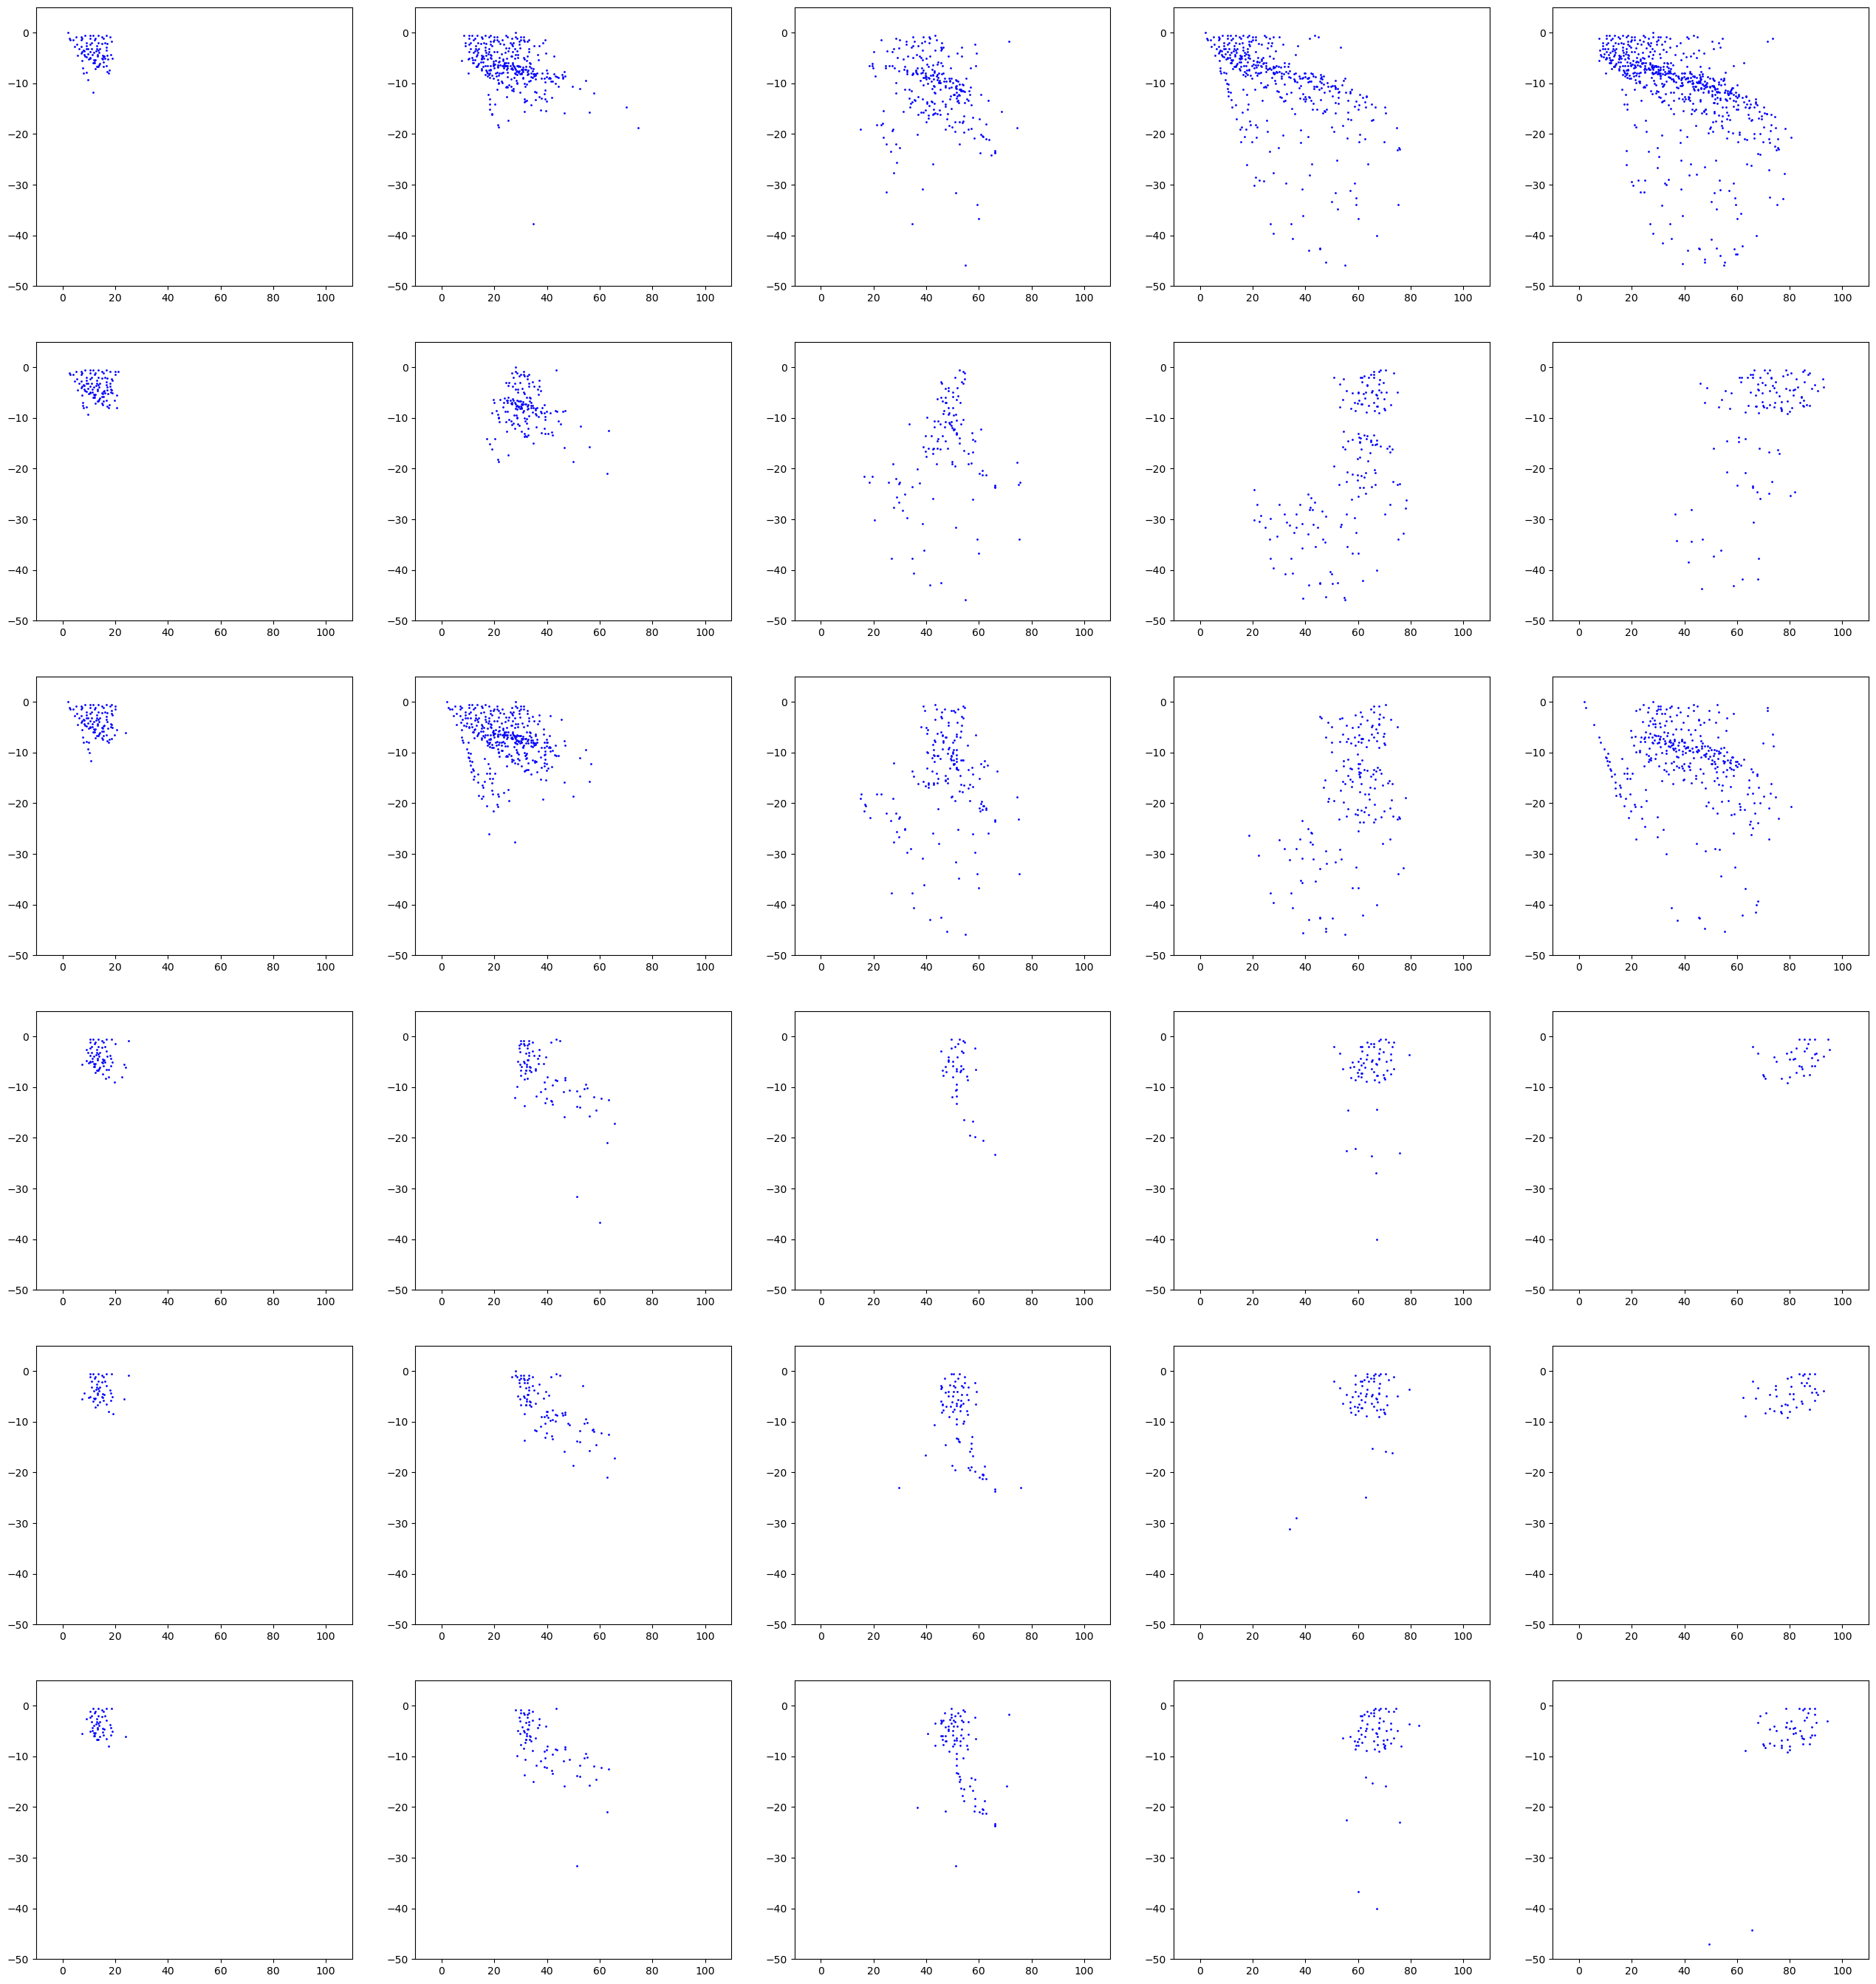

In [13]:
def degree(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_count = collections.Counter(degree_sequence)
    deg, cnt = zip(*degree_count.items())
    return degree_sequence, deg, cnt
def func(x, a, b, c):
    return a * (x - b) ** 2 + c

number_of_model = 6
f = plt.figure(figsize = (85,65), dpi = 100)
deg_list_file = pickle.load(open("/Volumes/Mac/Dropbox/TorchGNN_project/deg_list.p", "rb"))

for x, path in tqdm(enumerate(test_path)):
#     XYL = np.array(pickle.load(open(os.path.join(path, "XYL.p"), "rb")))
    XYL = np.array(pickle.load(open(os.path.join(path, "XYL2.p"), "rb")))
    
    min_L = np.min(np.log10(XYL[:,2]))
    max_L = np.max(np.log10(XYL[:,2]))
    
    threshold = min_L+0.3*(max_L-min_L)
#     threshold = max_L
    graph_index_toplot = np.where(np.log10(XYL[:,2]) < threshold)[0]
    
    ax = f.add_subplot(11, 13, int(x / number_of_model) + (x % number_of_model) * 13 + 1)
    plt.scatter(XYL[graph_index_toplot, 0], XYL[graph_index_toplot, 1], s=1, c='blue')
      
#     plt.xlim(-80,80)
#     plt.ylim(-80,20)
    
    plt.xlim(-10,110)
    plt.ylim(-50,5)